In [36]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime
import time

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)
pd.options.display.max_rows = 10
pd.options.display.max_columns = 6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import data

In [37]:
df = pd.read_csv("data/test.csv", encoding='latin1', sep='[\";]', engine='python')
df = df.drop(["Unnamed: 0","Unnamed: 19"],axis=1)

In [38]:
df.columns

Index(['Título do vídeo', 'Editor', 'Dispositivo de impressão',
       'Data de publicação', 'Alcance', 'Valor Gasto (BRL)', 'Click-to-Play',
       'Visualizações 10 segundos', 'Visualizações de 25% do vídeo',
       'Visualizações de 50% do vídeo', 'Visualizações de 75% do vídeo',
       'Visualizações de 95% do vídeo', 'Tempo médio assistido do vídeo',
       'Ações', 'Compartilhamentos da publicação', 'Comentários na publicação',
       'Envolvimento com a publicação', 'Reações à publicação'],
      dtype='object')

### 1. Explore Data

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Título do vídeo                  424 non-null    object 
 1   Editor                           424 non-null    object 
 2   Dispositivo de impressão         424 non-null    object 
 3   Data de publicação               424 non-null    int64  
 4   Alcance                          424 non-null    int64  
 5   Valor Gasto (BRL)                424 non-null    object 
 6   Click-to-Play                    413 non-null    float64
 7   Visualizações 10 segundos        406 non-null    float64
 8   Visualizações de 25% do vídeo    404 non-null    float64
 9   Visualizações de 50% do vídeo    395 non-null    float64
 10  Visualizações de 75% do vídeo    393 non-null    float64
 11  Visualizações de 95% do vídeo    388 non-null    float64
 12  Tempo médio assistido 

In [40]:
df.describe()

,Data de publicação,Alcance,Click-to-Play,...,Comentários na publicação,Envolvimento com a publicação,Reações à publicação
count,424.000000,424.000000,413.000000,...,223.000000,413.000000,311.000000
mean,42993.382075,58992.436321,25342.629540,...,42.049327,25663.869249,311.890675
std,8.709130,111287.778454,47790.219811,...,69.621708,48424.058613,575.316553
min,42979.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000
25%,42986.000000,46.000000,26.000000,...,3.000000,28.000000,8.000000
50%,42993.000000,3028.000000,1800.000000,...,14.000000,1821.000000,45.000000
75%,43001.000000,59629.500000,25164.000000,...,49.500000,25518.000000,247.000000
max,43008.000000,579119.000000,284866.000000,...,478.000000,287129.000000,3723.000000


In [41]:
df.head()

,Título do vídeo,Editor,Dispositivo de impressão,...,Comentários na publicação,Envolvimento com a publicação,Reações à publicação
0,Vídeo 13,Marcos,Smartphone Android,...,114.0,102441.0,1413.0
1,Vídeo 13,Marcos,iPad,...,1.0,1567.0,6.0
2,Vídeo 13,Marcos,Desktop,...,10.0,9978.0,91.0
3,Vídeo 13,Marcos,iPhone,...,27.0,29522.0,239.0
4,Vídeo 13,Marcos,Outros,...,NaN,4.0,NaN


### 2. Limpeza de dados

#### Consertando formato dos dados

A coluna "Valor Gasto (BRL)" está com valores definidos como `string`, utilizando ',' ao invés de '.' como o padrão americado de serapação decimal pede. A ',' será substituída e o valor convertido para `float`.

In [42]:

df['Valor Gasto (BRL)'] = df['Valor Gasto (BRL)'].str.replace(',','.').astype(float)
# Mostra uma prévia
df['Valor Gasto (BRL)'].head(5)

0    675.574960
1     14.676204
2     55.048255
3    246.438348
4      0.039962
Name: Valor Gasto (BRL), dtype: float64

Já a coluna "Tempo médio assistido do vídeo" está com os valores definidos em string, precisa ser convertido para inteiro/flutuante para que cálculos possam ser feitos. Será utilizado o tempo em segundos(s) do vídeo, no formato `float`

In [43]:

# Converte a string para datetime
df['Tempo médio assistido do vídeo (s)'] = df['Tempo médio assistido do vídeo'].apply(lambda x: time.strptime(x,'%H:%M:%S'))
# Retorna o tempo em segundos
df['Tempo médio assistido do vídeo (s)'] = df['Tempo médio assistido do vídeo (s)'].apply(lambda x: datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds())
# Mostra uma prévia
df['Tempo médio assistido do vídeo (s)'].head(5)

0     8.0
1     8.0
2     7.0
3     7.0
4    29.0
Name: Tempo médio assistido do vídeo (s), dtype: float64

A coluna "Data de publicação" está no formato `DATEVALUE` do Excel, que corresponde ao número de dias passados a partir de `01/01/1900`.

In [44]:

# Converte de DATEVALUE para datetime
df['Data de publicação'] = df['Data de publicação'].apply(lambda x: datetime.date(1900, 1, 1) + datetime.timedelta(days=x))
# Cria uma coluna de dias
df['Dia'] = df['Data de publicação'].apply(lambda x: x.day)
# Cria uma coluna de dias da semana
df['Dia da Semana'] = df['Data de publicação'].apply(lambda x: x.strftime("%A"))

#### Preenchendo Valores Faltantes

Abaixo podem ser vistos os valores faltantes de cada coluna

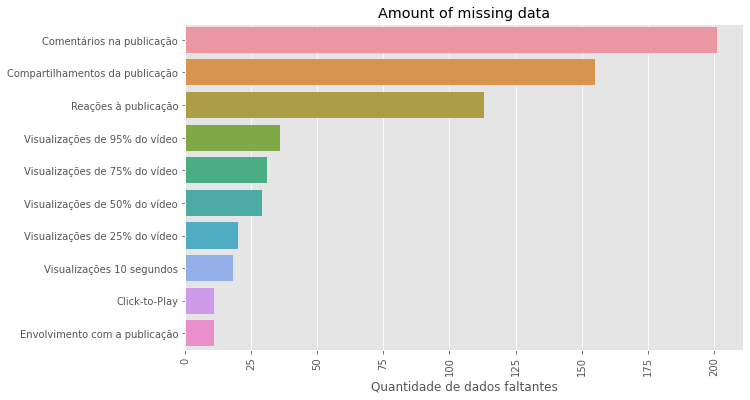

In [45]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
# Plot data
g = sns.barplot(y=missing.index, x=missing.values)
g.set_title('Amount of missing data')
g.set_xlabel("Quantidade de dados faltantes")
g.tick_params(axis='x', rotation=90)

In [46]:
df[missing.index] = df[missing.index].fillna(0)

### 3. Perguntas

### Qual o vídeo que teve o maior alcance?

In [47]:
highest_reach_video = df.loc[df['Alcance'].idxmax(), 'Título do vídeo']
print(f"O vídeo com maior alcance foi: {highest_reach_video}")

O vídeo com maior alcance foi: Vídeo 11


### Qual dispositivo que alcançou o maior número de pessoas?

In [48]:
highest_reach_device = df.loc[df['Alcance'].idxmax(), 'Dispositivo de impressão']
print(f"O dispositivo com maior alcance foi: {highest_reach_device}")

O dispositivo com maior alcance foi: Smartphone Android


### Qual foi o CPV75% (custo por visualização de 75%) médio de todos os vídeos?

In [49]:

# Seleciona dados apenas dos vídeos que tiveram 75% de visualização
viz75 = df[df['Visualizações de 75% do vídeo'] != 0]
# Calcula o CPV para os vídeos com 75% de visualização
cpv75_all = viz75['Valor Gasto (BRL)'].div(viz75['Visualizações de 75% do vídeo'])
# Calcula a média do CPV
mean_cpv75_all = np.mean(cpv75_all)
print(f"O CPV75% foi: R$ {mean_cpv75_all:0.4f}".replace('.',','))

O CPV75% foi: R$ 0,0513


### Qual o valor médio do CVP75% de Desktop?

In [50]:
# Seleciona dados apenas dos dispositivos Desktop
desktop = df[df['Dispositivo de impressão'] == 'Desktop']
# Dos dispositivos desktop, seleciona dados apenas dos que tiveram vídeos com 75% de visualização
desktop_viz75 = desktop[desktop['Visualizações de 75% do vídeo'] != 0]
# Calcula qual foi o CPV para os vídeos no desktop com 75% de visualização
desktop_cpv75 = desktop_viz75['Valor Gasto (BRL)'].div(desktop_viz75['Visualizações de 75% do vídeo'])
# Calcula a média do CPV
mean_desktop_cpv75_all = np.mean(desktop_cpv75)
print(f"O CPV75% para Desktop foi: R$ {mean_desktop_cpv75_all:0.4f}".replace('.',','))

O CPV75% para Desktop foi: R$ 0,0447


### Qual foi o dia do mês que teve o menor valor de CPV75%?

In [51]:
# Calcula os CPV75% e retorna o índice do menor valor
lowest_cpv75_idx = (df['Valor Gasto (BRL)']/df['Visualizações de 75% do vídeo']).idxmin()
# Filtra a entrada na linha=lowest_cpv75_idx e coluna='Data de publicação'
lowest_cpv75_date = df.loc[lowest_cpv75_idx, 'Data de publicação']
print(f"O dia do mês com menor CPV75% foi: {lowest_cpv75_date.strftime('%d')}")

O dia do mês com menor CPV75% foi: 05


### Qual dia da semana teve a melhor média de visualizações de 75%?

In [52]:
# Agrupa os dados pelo dia da semana e retorna a média de vizualização de cada dia
weekday_viz75 = df[['Visualizações de 75% do vídeo','Dia da Semana']].groupby('Dia da Semana').mean()
besk_weekday_viz75 = weekday_viz75.idxmax()[0]
besk_weekday_viz75
print(f"O dia com melhor média de viz foi: {besk_weekday_viz75}")

O dia com melhor média de viz foi: Friday


### Qual dia da semana obteve o CPV75% mais caro para Iphone?

In [53]:
# Seleciona dados apenas dos dispositivos iPhone
iphone = df[df['Dispositivo de impressão'] == 'iPhone']
# Dos dispositivos iPhone, seleciona dados apenas dos que tiveram vídeos com 75% de visualização
iphone_viz75 = iphone[iphone['Visualizações de 75% do vídeo'] != 0]
# Calcula qual foi o CPV para os vídeos no iPhone com 75% de visualização
iphone_cpv75 = iphone_viz75['Valor Gasto (BRL)'].div(iphone_viz75['Visualizações de 75% do vídeo'])
# Calcula qual foi o dia da semana CPV mais caro para os dados selecionados
highest_cpv75_iphone_date = iphone_viz75.loc[iphone_cpv75.idxmax(), 'Data de publicação']
print(f"O dia da semana com CPV75% mais caro para o iPhone foi: {highest_cpv75_iphone_date.strftime('%a')}")

O dia da semana com CPV75% mais caro para o iPhone foi: Tue


### Qual é o tempo médio assistido de todos os vídeos?

In [54]:
# Retorna a média da média de tempo assistido
avg_time_viz = df['Tempo médio assistido do vídeo (s)'].mean()
avg_time_viz
print(f"O tempo médio assistido foi: {avg_time_viz:0.4f} segundos")

O tempo médio assistido foi: 10.6863 segundos


### Qual dispositivo tem o maior tempo médio assistido? 

In [55]:
# Agrupa a média do tempo de visualização por dispositivo
viz_time_by_device = df[['Dispositivo de impressão','Tempo médio assistido do vídeo (s)']].groupby('Dispositivo de impressão').mean()
highest_viz_time_device = viz_time_by_device.sort_values('Tempo médio assistido do vídeo (s)').idxmax()[0]
highest_viz_time_device
print(f"O dispositivo com maior tempo médio assistido foi: {highest_viz_time_device}")

O dispositivo com maior tempo médio assistido foi: Outros


### Das pessoas que deram play, qual vídeo foi o que mais segurou-as até o final?

In [56]:
# Filter only values where the video was clicked and the vizualization rate is 95% or higher
clicked_full_viz = df[(df['Click-to-Play'] > 0) & (df['Visualizações de 95% do vídeo']>0)]
# Find the index of the highest 95% viz
max_value_idx = clicked_full_viz['Visualizações de 95% do vídeo'].idxmax()
# Find the video name with the highest 95% viz
highets_play_time_viz = clicked_full_viz.loc[max_value_idx,'Título do vídeo']
print(f"O vídeo em que as pessoas deram play e assistiram por mais tempo foi: {highets_play_time_viz}")

O vídeo em que as pessoas deram play e assistiram por mais tempo foi: Vídeo 12


### Suponhamos que você fosse promover apenas um dos editores que produziram os vídeos cujos resultados estão no arquivo. Qual dos editores você promoveria? Por quê? Sua resposta deve ser baseada em dados, lógica e premissas.

$Average~view~time =\frac{Total~video~view~time}{Video~starts}$

Então

$Total~video~view~time =  Video~starts \times Average~view~time$

[ref](https://support.google.com/admanager/answer/2759433?hl=en#calculated-metric)

In [57]:
# Tempo total assitido
df['Total de tempo assistido (s)'] = df['Click-to-Play'].mul(df['Tempo médio assistido do vídeo (s)'])

df['Videos finalizados'] = df['Visualizações de 95% do vídeo']/df['Click-to-Play']

# Custo por Click
clicked  = df[df['Click-to-Play'] != 0]
df['CPC'] = clicked['Valor Gasto (BRL)'].div(clicked['Click-to-Play'])

# Custo por Ação
clicked_action  = df[(df['Click-to-Play'] > 0) & (df['Ações'] > 0)]
df['CPA'] = clicked_action['Valor Gasto (BRL)'].div(clicked_action['Ações'])

# Total de Engajamento
df['Engajamento'] = df[['Compartilhamentos da publicação', 'Comentários na publicação', 'Envolvimento com a publicação', 'Reações à publicação']].sum(axis=1)

# Total de Engajamento
df['CPE'] = df['Valor Gasto (BRL)'].div(df['Engajamento'])

# Taxa de reprodução (Número de reproduções)/Alcance
df['Play-rate'] = df['Click-to-Play'].div(df['Alcance'])

# Tratando valores inf, resultado de divisão por 0
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [58]:
df[['Editor','CPC','CPA','CPE','Engajamento','Tempo médio assistido do vídeo (s)','Videos finalizados']].groupby('Editor').mean()

,CPC,CPA,CPE,Engajamento,Tempo médio assistido do vídeo (s),Videos finalizados
Editor,,,,,,
Luiz,0.009333,0.009258,0.009199,23889.941606,10.102190,0.155826
Marcos,0.009284,0.009175,0.009122,25699.611111,10.920635,0.175609
Osvaldo,0.009529,0.009197,0.009076,26213.000000,11.000000,0.181590


In [59]:
s = df[['Editor','CPC','CPA','CPE']].groupby('Editor').mean().reset_index()
s

,Editor,CPC,CPA,CPE
0,Luiz,0.009333,0.009258,0.009199
1,Marcos,0.009284,0.009175,0.009122
2,Osvaldo,0.009529,0.009197,0.009076


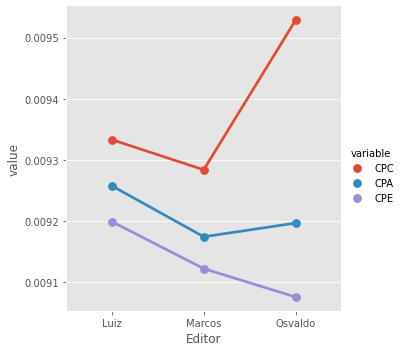

In [60]:
s_melted = pd.melt(s, id_vars = "Editor")
g = sns.catplot(x = 'Editor', y='value', 
               hue = 'variable',data=s_melted, kind='point')

### Quais ajustes de orçamento você faria considerando a seguinte situação:
Você trabalha na área de marketing de uma empresa que possui um produto cujo o preço de venda é de R$ 500,00. Foi finalizado o planejamento e você ficou com a responsabilidade da geração de tráfego e acompanhamento das conversões. Foi disponibilizado um orçamento para divulgação no valor de: R$ 100.000,00. O objetivo esperado de você é utilizar o orçamento para realizar 400 vendas. Com base na situação acima responda a pergunta abaixo. Após rodar 4 campanhas de divulgação por 2 dias você obteve os seguintes resultados:

In [112]:

print(f"Faturamento esperado: R$ {500 * 400 :0.2f}")

Faturamento esperado: R$ 200000.00


In [102]:

df = pd.DataFrame({'Campanha':['C1','C2','C3','C4'], 'N Vendas': [22,13, 25, 10], 'Custo':[8000, 6000, 4000, 2000]})
# Custo por venda
df['CPV'] = df['Custo'].div(df['N Vendas'])
df

,Campanha,N Vendas,Custo,CPV
0,C1,22,8000,363.636364
1,C2,13,6000,461.538462
2,C3,25,4000,160.000000
3,C4,10,2000,200.000000


CPV médio das campanhas

In [111]:

custo_medio_campanhas = df['Custo'].sum()/ df['N Vendas'].sum()
print(f"O CPV médio das campanhas foi de R${custo_medio_campanhas: 0.2f}".replace('.',','))

O CPV médios das campanhas foi de R$ 285,71


Orgamento e unidades restantes após 4 campanhas:

In [88]:

orcamento_inicial = 100000
orcamento_restante = orcamento - df['Custo'].sum()
unidades_restantes = 400 - df['N Vendas'].sum()

orcamento_restante, unidades_restantes

(80000, 330)

CPV desejado

In [118]:

CPV_alvo = orcamento_restante / unidades_restantes
print(f"O CPV desejado é de: R$ {CPV_alvo:0.2f}")

O CPV desejado é de: R$ 242.42


O CPV (Custo por Venda) desejado para a venda das 330 unidades restantes é R$ 242,24, o que pode ser alcançado diminuindo o CPL (Custo por Lead) ou LPV (Leads por Venda). As campanhas C3 e C4 tiveram ótimos CPV's, as estratégias utilizadas nelas poderiam ser repetidas.